In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1])
    print(city.city_name, city.country_code) 

narsaq gl
nizhneyansk ru
tuatapere nz
vila velha br
balad iq
lebu cl
phumi samraong kh
murmino ru
nhulunbuy au
cabo san lucas mx
rock sound bs
caravelas br
pangkalanbuun id
miri my
tiksi ru
bonfim br
new norfolk au
saint george bm
illoqqortoormiut gl
busselton au
ushuaia ar
hobart au
avarua ck
tokur ru
bluff nz
hami cn
sitka us
suleja ng
avera pf
mataura pf
taolanaro mg
chicama pe
kavieng pg
geraldton au
guadalupe y calvo mx
ushuaia ar
luderitz na
belushya guba ru
scarborough tt
san juan ar
bengkulu id
atuona pf
mahebourg mu
new norfolk au
kapaa us
carnarvon au
atasu kz
ushuaia ar
taolanaro mg
kruisfontein za
hobart au
hatillo us
aklavik ca
yining cn
cidreira br
yerbogachen ru
yellowknife ca
lisakovsk kz
fairbanks us
thompson ca
deputatskiy ru
laguna br
plettenberg bay za
archidona ec
hermanus za
severo-kurilsk ru
hasaki jp
hithadhoo mv
cape town za
hermanus za
upernavik gl
avarua ck
asau tv
mataura pf
thompson ca
mys shmidta ru
atuona pf
busselton au
kirakira sb
domoni km
porto novo c

lompoc us
fare pf
hermanus za
praia da vitoria pt
buala sb
ushuaia ar
kamenka ru
narsaq gl
kapaa us
siva ru
ushuaia ar
jamestown sh
tasiilaq gl
bani walid ly
husavik is
barrow us
margate za
oussouye sn
deh rawud af
witu ke
butaritari ki
amderma ru
tual id
hurghada eg
cidreira br
mahebourg mu
puerto ayora ec
ushuaia ar
illoqqortoormiut gl
ancud cl
punta arenas cl
ushuaia ar
muisne ec
kapaa us
punta arenas cl
ushuaia ar
norman wells ca
ushuaia ar
huarmey pe
hasaki jp
provideniya ru
bathsheba bb
hermanus za
arlit ne
castro cl
kapaa us
muli mv
puerto ayora ec
nador ma
jamestown sh
skjervoy no
banikoara bj
mataura pf
kloulklubed pw
lorengau pg
provideniya ru
butaritari ki
busselton au
kampot kh
hihifo to
bjornevatn no
hermanus za
isangel vu
new norfolk au
tsihombe mg
rikitea pf
lebu cl
saint-philippe re
beloha mg
barentsburg sj
deputatskiy ru
hermanus za
yellowknife ca
busselton au
nabire id
albany au
eureka us
buenavista co
belushya guba ru
sao jose da coroa grande br
laguna br
rikitea pf


In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name.title()

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [17]:
# Import the requests library.
import requests
from datetime import datetime

# Import the API key.
from config import weather_api_key

In [16]:
# Create an endpoint URL for a city.
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"


In [18]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | Narsaq
Processing Record 2 of Set 1 | Nizhneyansk
City not found. Skipping...
Processing Record 3 of Set 1 | Tuatapere
Processing Record 4 of Set 1 | Vila Velha
Processing Record 5 of Set 1 | Balad
Processing Record 6 of Set 1 | Lebu
Processing Record 7 of Set 1 | Phumi Samraong
City not found. Skipping...
Processing Record 8 of Set 1 | Murmino
Processing Record 9 of Set 1 | Nhulunbuy
Processing Record 10 of Set 1 | Cabo San Lucas
Processing Record 11 of Set 1 | Rock Sound
Processing Record 12 of Set 1 | Caravelas
Processing Record 13 of Set 1 | Pangkalanbuun
Processing Record 14 of Set 1 | Miri
Processing Record 15 of Set 1 | Tiksi
Processing Record 16 of Set 1 | Bonfim
Processing Record 17 of Set 1 | New Norfolk
Processing Record 18 of Set 1 | Saint George
Processing Record 19 of Set 1 | Illoqqortoormiut
City not found. Skipping...
Processing Record 20 of Set 1 | Busselton
Processing Record 21 

Processing Record 39 of Set 4 | Quelimane
Processing Record 40 of Set 4 | Longyearbyen
Processing Record 41 of Set 4 | Sentyabrskiy
City not found. Skipping...
Processing Record 42 of Set 4 | Camana
Processing Record 43 of Set 4 | Qaanaaq
Processing Record 44 of Set 4 | Yarmouth
Processing Record 45 of Set 4 | Mayo
Processing Record 46 of Set 4 | Garanhuns
Processing Record 47 of Set 4 | Campbell River
Processing Record 48 of Set 4 | Babylon
Processing Record 49 of Set 4 | Salaga
Processing Record 50 of Set 4 | Sekoma
Processing Record 1 of Set 5 | Nakhon Thai
Processing Record 2 of Set 5 | Kropotkin
Processing Record 3 of Set 5 | Hamilton
Processing Record 4 of Set 5 | Labuhan
Processing Record 5 of Set 5 | Kuito
Processing Record 6 of Set 5 | Nome
Processing Record 7 of Set 5 | Zhirnovsk
Processing Record 8 of Set 5 | Okitipupa
Processing Record 9 of Set 5 | Tsihombe
City not found. Skipping...
Processing Record 10 of Set 5 | Chumikan
Processing Record 11 of Set 5 | Kuppam
Processing

Processing Record 29 of Set 8 | Sumter
Processing Record 30 of Set 8 | Nosy Varika
Processing Record 31 of Set 8 | Kavaratti
Processing Record 32 of Set 8 | Toliary
City not found. Skipping...
Processing Record 33 of Set 8 | Anori
Processing Record 34 of Set 8 | Pochutla
Processing Record 35 of Set 8 | Delray Beach
Processing Record 36 of Set 8 | Salas
Processing Record 37 of Set 8 | Wonthaggi
Processing Record 38 of Set 8 | Darhan
Processing Record 39 of Set 8 | Kandrian
Processing Record 40 of Set 8 | Sterling
Processing Record 41 of Set 8 | Belaya Gora
Processing Record 42 of Set 8 | Nikolskoye
Processing Record 43 of Set 8 | Port Keats
Processing Record 44 of Set 8 | Fredericton
Processing Record 45 of Set 8 | Petropavlovsk-Kamchatskiy
Processing Record 46 of Set 8 | Takoradi
Processing Record 47 of Set 8 | Codrington
Processing Record 48 of Set 8 | Borba
Processing Record 49 of Set 8 | Altamont
Processing Record 50 of Set 8 | Umzimvubu
City not found. Skipping...
Processing Record

Processing Record 16 of Set 12 | Choucheng
City not found. Skipping...
Processing Record 17 of Set 12 | Darnah
Processing Record 18 of Set 12 | Tonekabon
Processing Record 19 of Set 12 | Kiamba
Processing Record 20 of Set 12 | Ballina
Processing Record 21 of Set 12 | Metro
Processing Record 22 of Set 12 | Usinsk
Processing Record 23 of Set 12 | Vardo
Processing Record 24 of Set 12 | Bud
Processing Record 25 of Set 12 | Rincon
Processing Record 26 of Set 12 | Korla
Processing Record 27 of Set 12 | Luena
Processing Record 28 of Set 12 | Apaseo El Grande
Processing Record 29 of Set 12 | Komsomolskiy
Processing Record 30 of Set 12 | Tonstad
Processing Record 31 of Set 12 | Alice Springs
Processing Record 32 of Set 12 | Oranjemund
Processing Record 33 of Set 12 | Paamiut
Processing Record 34 of Set 12 | Zelenoborskiy
Processing Record 35 of Set 12 | Yanchukan
City not found. Skipping...
Processing Record 36 of Set 12 | Olafsvik
Processing Record 37 of Set 12 | Pacifica
Processing Record 38 

In [20]:
len(city_data)

574

In [32]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Narsaq,60.9167,-46.0500,35.60,87,90,2.30,GL,2021-04-03 03:05:48
1,Tuatapere,-46.1333,167.6833,62.01,57,100,8.01,NZ,2021-04-03 03:05:49
2,Vila Velha,-20.3297,-40.2925,71.60,94,90,4.61,BR,2021-04-03 03:05:49
3,Balad,34.0164,44.1453,54.93,59,0,17.94,IQ,2021-04-03 03:05:49
4,Lebu,-37.6167,-73.6500,53.78,92,18,15.43,CL,2021-04-03 03:05:50
5,Murmino,54.6036,40.0544,27.00,100,100,6.82,RU,2021-04-03 03:05:50
6,Nhulunbuy,-12.2333,136.7667,86.00,70,75,17.27,AU,2021-04-03 03:05:51
7,Cabo San Lucas,22.8909,-109.9124,77.00,38,40,9.40,MX,2021-04-03 03:05:51
8,Rock Sound,24.9000,-76.2000,70.02,65,99,27.34,BS,2021-04-03 03:05:52
9,Caravelas,-17.7125,-39.2481,75.20,90,16,4.88,BR,2021-04-03 03:05:52


In [33]:
city_data_df = city_data_df.iloc[:,[0,7,8,1,2,3,4,5,6]]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Narsaq,GL,2021-04-03 03:05:48,60.9167,-46.0500,35.60,87,90,2.30
1,Tuatapere,NZ,2021-04-03 03:05:49,-46.1333,167.6833,62.01,57,100,8.01
2,Vila Velha,BR,2021-04-03 03:05:49,-20.3297,-40.2925,71.60,94,90,4.61
3,Balad,IQ,2021-04-03 03:05:49,34.0164,44.1453,54.93,59,0,17.94
4,Lebu,CL,2021-04-03 03:05:50,-37.6167,-73.6500,53.78,92,18,15.43
...,...,...,...,...,...,...,...,...,...
569,Pyay,MM,2021-04-03 03:08:32,18.8167,95.2167,84.09,55,100,1.81
570,Rawson,AR,2021-04-03 03:08:33,-43.3002,-65.1023,64.81,69,8,10.27
571,Linfen,CN,2021-04-03 03:08:33,36.0889,111.5189,54.28,62,100,7.72
572,Yumen,CN,2021-04-03 03:08:33,40.2833,97.2000,46.94,29,100,25.50


In [34]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

## Plot Latitude vs. Temperature

In [35]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

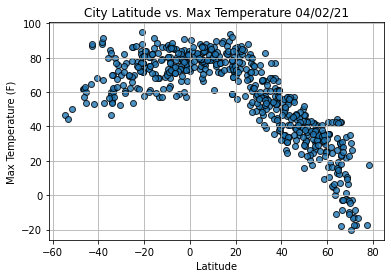

In [37]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

### Plot Latitude vs. Humidity

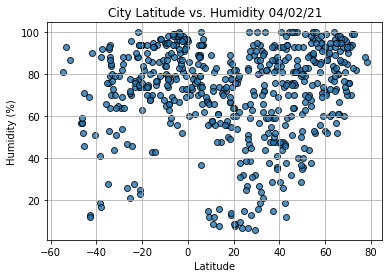

In [38]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

### Plot Latitude vs. Cloudiness

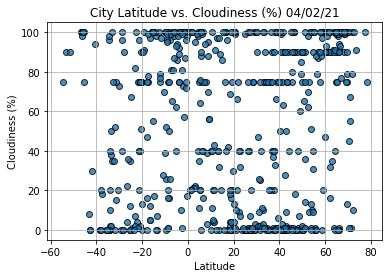

In [39]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

### Plot Latitude vs. Wind Speed

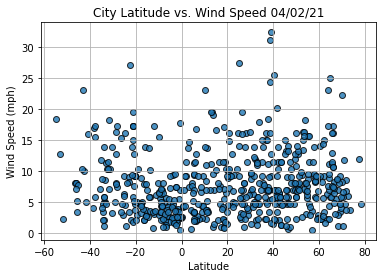

In [40]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

## Use Linear Regression

#### Find the Correlation Between Latitude and Maximum Temperature

In [55]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()  

In [56]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

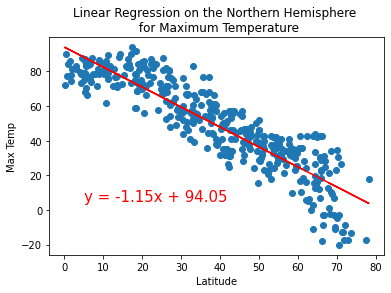

In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(5,5))

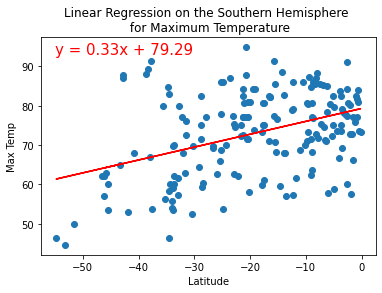

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-55,93))

### Find the Correlation Between Latitude and Percent Humidity

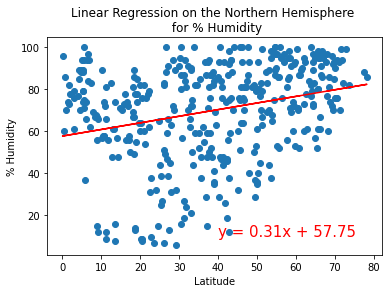

In [63]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

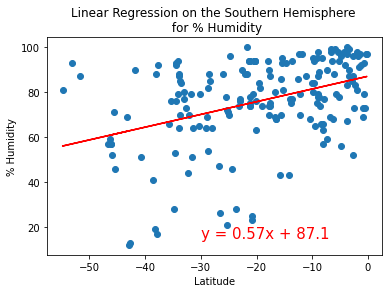

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-30,15))

### Find the Correlation Between Latitude and Percent Cloudiness

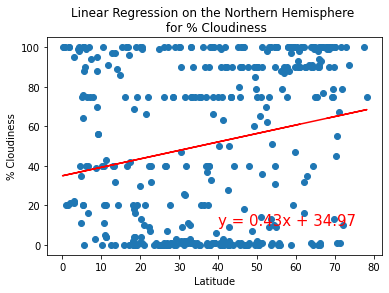

In [65]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

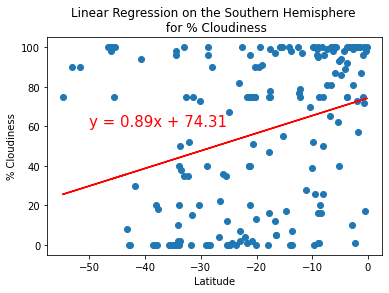

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

### Find the Correlation Between Latitude and Wind Speed

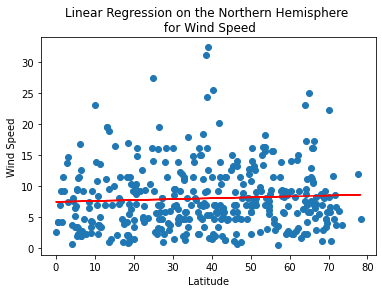

In [67]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

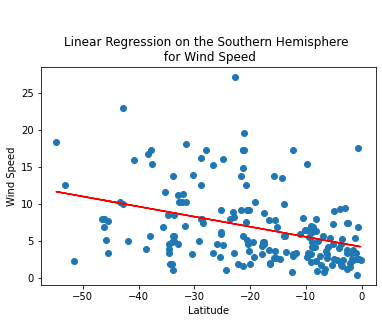

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))